## Constants

In [90]:
LABELS = '../data/raw/labels.csv'
TRAIN = '../data/raw/train/'
TEST = '../data/raw/test/'
MODEL_PATH = '../models/'

## Import tools

In [91]:
import pandas as pd
import numpy as np
import tensorflow as tf 
import tensorflow_hub as hub
from IPython.display import Image
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

## Reading data

In [92]:
labels_df = pd.read_csv(LABELS)
labels_df['id'] = labels_df['id'] + '.jpg'

In [93]:
labels_df.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07.jpg,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97.jpg,dingo
2,001cdf01b096e06d78e9e5112d419397.jpg,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d.jpg,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62.jpg,golden_retriever


### Most breeds we have

In [94]:
labels_df['breed'].value_counts()

scottish_deerhound      126
maltese_dog             117
afghan_hound            116
entlebucher             115
bernese_mountain_dog    114
                       ... 
golden_retriever         67
brabancon_griffon        67
komondor                 67
eskimo_dog               66
briard                   66
Name: breed, Length: 120, dtype: int64

<AxesSubplot:>

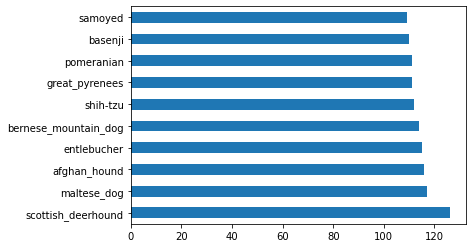

In [95]:
labels_df['breed'].value_counts().head(10).plot(kind='barh')

### Distribution of classes freq

<AxesSubplot:>

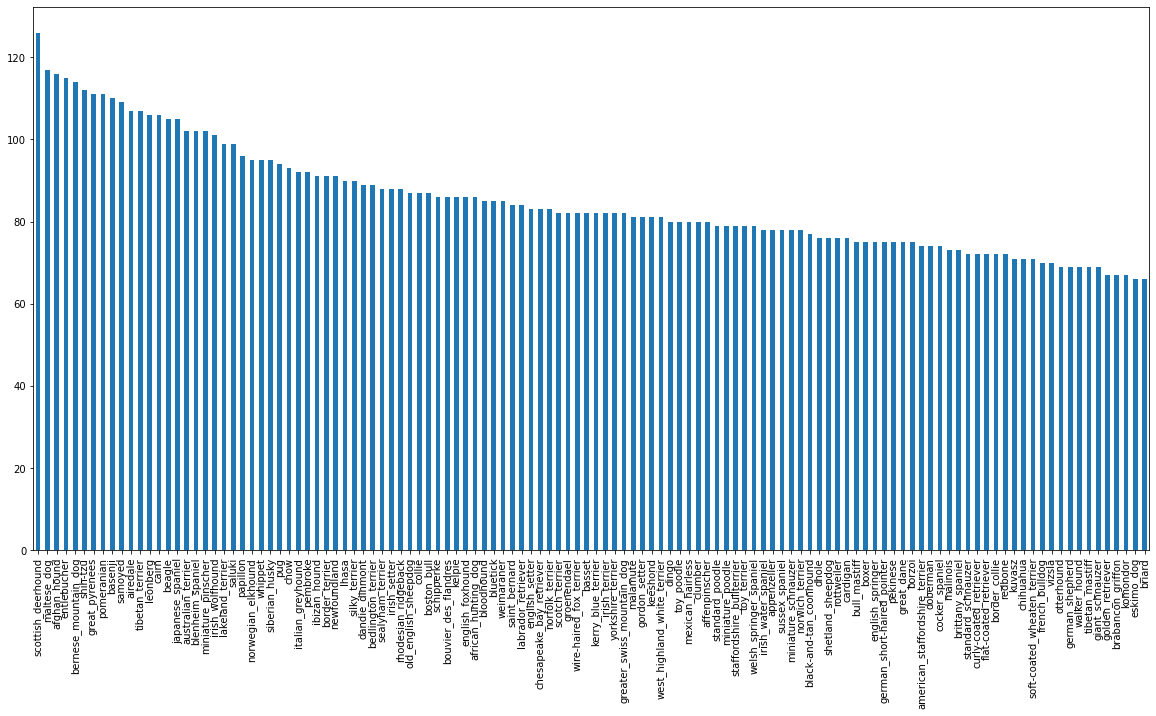

In [96]:
labels_df['breed'].value_counts().plot.bar(figsize=(20,10))

### Display image

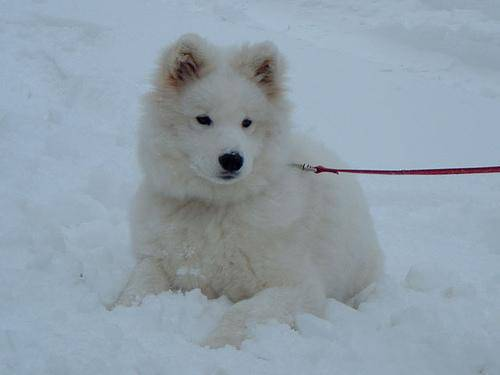

In [97]:
Image(str(TRAIN) + str(labels_df['id'][70]))

### Store pathes of images into list

In [98]:
filenames = [TRAIN + fname for fname in labels_df['id']]

In [99]:
filenames[:10]

['../data/raw/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 '../data/raw/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 '../data/raw/train/001cdf01b096e06d78e9e5112d419397.jpg',
 '../data/raw/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 '../data/raw/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 '../data/raw/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 '../data/raw/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 '../data/raw/train/002a283a315af96eaea0e28e7163b21b.jpg',
 '../data/raw/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 '../data/raw/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

### Recheck

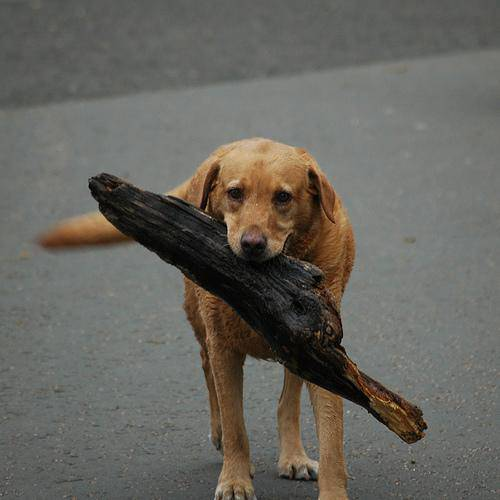

In [100]:
Image(filenames[4])

In [101]:
labels_df['breed'][4]

'golden_retriever'

## Convert data into numbers

In [102]:
breeds = np.array(labels_df['breed'])
len(breeds)

10222

### Get boolean labels

In [103]:
unique_breeds = np.unique(breeds)
bool_labels = [label == unique_breeds for label in breeds]

In [104]:
bool_labels[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [105]:
len(bool_labels)

10222

## Creating Train/test split

In [106]:
# Setup X & y variables
X = filenames
y = bool_labels

In [107]:
X_train, X_test, y_train, y_test = train_test_split(X[:5000], y[:5000], test_size=0.2)

len(X_train), len(y_train), len(X_test), len(y_test)


(4000, 4000, 1000, 1000)

In [108]:
X_train[:5], y_train[:2]

(['../data/raw/train/2adab84cf8072a0c338193cb2f055901.jpg',
  '../data/raw/train/06e548623971fbdf8c80b0614f811f50.jpg',
  '../data/raw/train/5378e91b030e6018711e6eeffb45d61c.jpg',
  '../data/raw/train/66caeacfa0178274b3a981776bc3432f.jpg',
  '../data/raw/train/3417f5bff1abe1f89a98a22d8fec04d8.jpg'],
 [array([False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False,  True, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, 

### process images function

In [109]:
# Define the shape of image (224, 224)
IMG_size = 224

In [110]:
def process_image(image_path):
    """
    Taking path of an image and turn it into tensor
    """
    
    # Read an image file
    image = tf.io.read_file(image_path)
    
    # Convert the image into tensor
    image = tf.image.decode_jpeg(image, channels=3)

    # Convert color channel values from 0-255 to 0-1
    image = tf.image.convert_image_dtype(image, tf.float32)

    # Resize the image shape (244,244)
    image = tf.image.resize(image, size=[IMG_size, IMG_size])

    return image


In [111]:
# Create a simple function to return a tuple (image, label)
def get_image_label(image_path, label):
  """
  Takes an image file path name and the associated label,
  processes the image and returns a tuple of (image, label).
  """
  image = process_image(image_path)
  return image, label

## Turn data into batches

In [112]:
# Define batch size
BATCH_SIZE = 32

# Create function to turn data into batches

def create_data_batches(X, y=None, batch_size=BATCH_SIZE, valid_data=False, test_data=False):
    """
    Split the data into batches
    """

    # If we have test dataset, we don't need labels
    if test_data:
        print("Creating test data batches...")
        data = tf.data.Dataset.from_tensor_slices((tf.constant(X)))
        data_batch = data.map(process_image).batch(BATCH_SIZE)
        return data_batch

    # If we have valid data set, we need to shuffle the data
    elif valid_data:
        print("Creating validation data batches...")
        data = tf.data.Dataset.from_tensor_slices((tf.constant(X),
        tf.constant(y)))
        data_batch = data.map(get_image_label).batch(BATCH_SIZE)
        return data_batch

    else:
        print('Creating training data batches...')
        data = tf.data.Dataset.from_tensor_slices((tf.constant(X),
        tf.constant(y)))

        # Shuffling pathnames and labels before mapping
        data = data.shuffle(buffer_size=len(X))
        data_batch = data.map(get_image_label).batch(BATCH_SIZE)
        return data_batch

In [113]:
train_data = create_data_batches(X_train, y_train)
test_data = create_data_batches(X_train, y_train, valid_data=True)

Creating training data batches...
Creating validation data batches...


In [114]:
train_data.element_spec, ' ' , test_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 ' ',
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

### Display 25 images function

In [115]:
def show_25_images(images, labels):
    """
    Display 25 images and theier labels from the batch
    """

    plt.figure(figsize=(15,15))

    for i in range(25):
        ax = plt.subplot(5,5, i+1)
        plt.imshow(images[i])
        plt.title(unique_breeds[labels[i].argmax()])
        plt.axis('off')


### Convert the batch into iteretable data 

In [116]:
train_images, train_labels = next(train_data.as_numpy_iterator())

len(train_images), len(train_labels)

(32, 32)

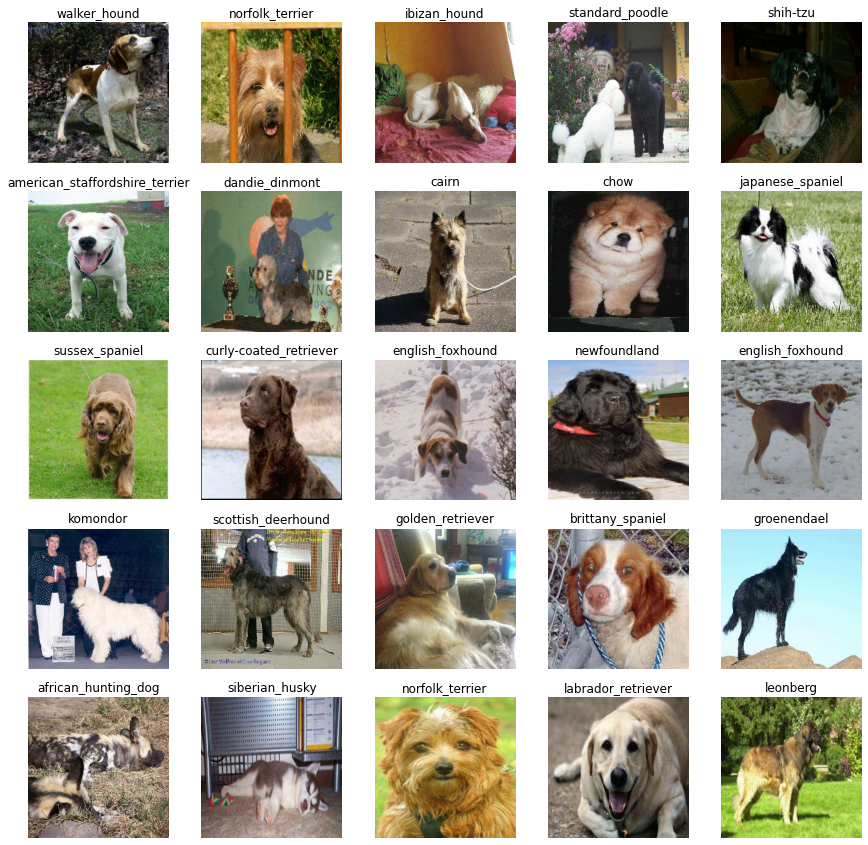

In [117]:
show_25_images(train_images, train_labels)

## Setup the input and output

In [118]:
INPUT_SHAPE = [None, IMG_size, IMG_size, 3]
OUTPUT_SHAPE = len(unique_breeds)   
MODEL_URL = 'https://tfhub.dev/google/imagenet/mobilenet_v3_large_075_224/classification/5'

In [119]:
def create_model(input_shape=INPUT_SHAPE, output_shape=OUTPUT_SHAPE):

    # Load the model
    model = tf.keras.Sequential([
    hub.KerasLayer(MODEL_URL), # Layer 1 (input layer)
    tf.keras.layers.Dense(units=OUTPUT_SHAPE, 
                          activation="softmax") # Layer 2 (output layer)
    ])
    

    # Compile the model
    model.compile(
      loss=tf.keras.losses.CategoricalCrossentropy(), 
      optimizer=tf.keras.optimizers.Adam(),
      metrics=["accuracy"] 
    )

    # Build the model
    model.build(INPUT_SHAPE)

    return model

## Building the model

In [ ]:
model = create_model()
model.summary()

In [ ]:
%load_ext tensorboard

## Create a tensorflow board

In [ ]:
import datetime
import os
# Create a function to build a TensorBoard callback
def create_tensorboard_callback():
  # Create a log directory for storing TensorBoard logs
  logdir = os.path.join("../models/",
                        # Make it so the logs get tracked whenever we run an experiment
                        datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
  return tf.keras.callbacks.TensorBoard(logdir)

### Handle early stopping

In [ ]:
# Create early stopping (once our model stops improving, stop training)
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",
                                                  patience=3) # stops after 3 rounds of no improvements

## Training the model

In [ ]:
EPOCHES = 3

In [ ]:
def train_model():
  """
  Trains a given model and returns the trained version.
  """
  # Create a model
  model = create_model()

  # Create new TensorBoard session everytime we train a model
  tensorboard = create_tensorboard_callback()

  # Fit the model to the data passing it the callbacks we created
  model.fit(x=train_data,
            epochs=EPOCHES,
            validation_data=test_data,
            validation_freq=1, # check validation metrics every epoch
            callbacks=[tensorboard, early_stopping])
  
  return model

In [ ]:
model = train_model()

Epoch 1/3
  1/125 [..............................] - ETA: 0s - loss: 5.5441 - accuracy: 0.0000e+00WARNING:tensorflow:From F:\PROGRAMS\Programming\anaconda\envs\DS\lib\site-packages\tensorflow\python\ops\summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.


Instructions for updating:
use `tf.profiler.experimental.stop` instead.


125/125 [==============================] - 281s 2s/step - loss: 2.4636 - accuracy: 0.4505 - val_loss: 0.6250 - val_accuracy: 0.8575
Epoch 2/3
125/125 [==============================] - 274s 2s/step - loss: 0.5730 - accuracy: 0.8520 - val_loss: 0.2649 - val_accuracy: 0.9545
Epoch 3/3
125/125 [==============================] - 273s 2s/step - loss: 0.2688 - accuracy: 0.9470 - val_loss: 0.1428 - val_accuracy: 0.9845


## Predict test data

In [121]:
test_data

<BatchDataset shapes: ((None, 224, 224, 3), (None, 120)), types: (tf.float32, tf.bool)>

In [ ]:
# Make predictions on the validation data (not used to train on)
predictions = model.predict(test_data, verbose=1) # verbose shows us how long there is to go
predictions

125/125 [==============================] - 147s 1s/step


array([[2.0058894e-04, 1.7872322e-04, 2.2664422e-04, ..., 1.1518486e-05,
        1.9985940e-03, 1.9667793e-02],
       [7.5796364e-05, 1.7353723e-05, 2.1091242e-04, ..., 3.5398760e-05,
        2.7243863e-05, 3.3070748e-05],
       [4.7272597e-06, 7.4477302e-04, 1.2691949e-05, ..., 1.5824337e-05,
        5.8712253e-06, 9.8901673e-06],
       ...,
       [7.7778679e-07, 1.1276004e-03, 1.1817240e-05, ..., 1.0598054e-06,
        8.0627433e-07, 1.0458028e-07],
       [1.6795219e-06, 3.1507255e-08, 1.3753887e-03, ..., 5.1944582e-05,
        1.1878649e-06, 1.6909608e-07],
       [2.5634633e-06, 4.1430834e-04, 2.5163929e-04, ..., 5.4076023e-04,
        1.2300089e-04, 8.4286032e-05]], dtype=float32)

In [ ]:
#print(predictions[0])
print(np.argmax(predictions[0]))
print(unique_breeds[np.argmax(predictions[0])])

102
silky_terrier


In [ ]:
images = []
labels = []
for i,l in test_data.unbatch().as_numpy_iterator():
    images.append(i)
    labels.append(unique_breeds[np.argmax(l)])

In [ ]:
unique_breeds[np.argmax(predictions[555])]

'pekinese'

(-0.5, 223.5, 223.5, -0.5)

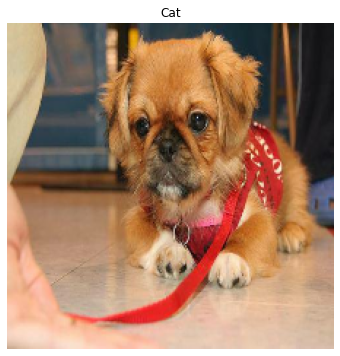

In [ ]:
plt.figure(figsize=(6,6))
plt.imshow(images[555])
plt.title(labels[555])
plt.axis('off')

## 

## Save the model

In [ ]:
def save_model(model, suffix=None):
  """
  Saves a given model in a models directory and appends a suffix (str)
  for clarity and reuse.
  """
  
  print(f"Saving model to: {MODEL_PATH + 'model.h5'}...")
  model.save(MODEL_PATH + 'model.h5')


In [ ]:
save_model(model)

Saving model to: ../models/model.h5...


In [ ]:
import pickle

with open(MODEL_PATH + 'unique_breeds.pkl', 'wb') as f:
   pickle.dump(unique_breeds, f)